In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# one-way anova

여러 집단을 대상을 t 테스트를 여러번 하게 된다면,
알파(1종오류확률)이 그만큼 곱해지고, 1종오류 확률이 높아진다.

4집단을 비교하려면 6번 t테스트 해야하는데, 이때 알파가 6번인 것에 반해 **아노바분석을 한다면 알파가 한 번이다.**

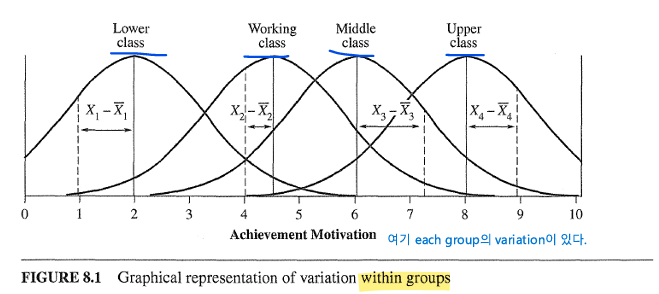
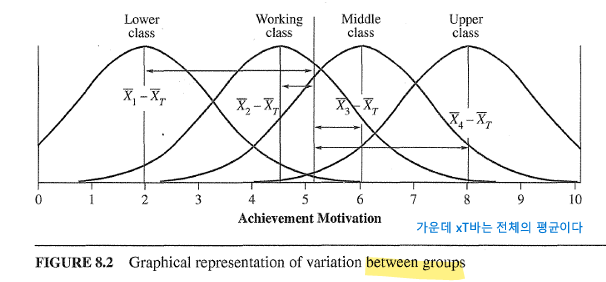

집단 간 분산과
집단 내 분산은
상호배타적이다
(mutually exclusive)하다.
하나가 올라가면
하나가 내려간다.

SStotal = SSbet + SSwithin이니까

집단간 분산과 집단내 분산은
상호배타적이기 떄문에
하나가 올라가면 하나가 내려간다.
둘다 올라가거나 내려가는 것은
동시에 결코 불가능하다.
즉, trad off 관계이다.

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
# Load the dataset
msatisfaction = pd.read_csv('/content/drive/MyDrive/data analysis and coding/msatisfaction.csv')

In [4]:
# Recode provider as a categorical variable and label it
msatisfaction["provider"] = msatisfaction["provider"].astype('category')
msatisfaction["provider"] = msatisfaction["provider"].cat.rename_categories({1: 'SKT', 2: 'KT', 3: 'LGU'})

In [5]:
# Perform ANOVA
oneway = ols('msatisfaction["satisfaction"] ~ msatisfaction["provider"]', data=msatisfaction).fit()
anova_table = sm.stats.anova_lm(oneway)
print(anova_table)

                             df  sum_sq    mean_sq         F    PR(>F)
msatisfaction["provider"]   2.0    25.2  12.600000  8.217391  0.005649
Residual                   12.0    18.4   1.533333       NaN       NaN


## multiple comparisons

**Multiple Comparison of Means**

Unlike the 𝑡 test, HSD takes into account that the likelihood of Type I Error increases
as the number of means being compared increases. The 𝑞 value depends upon the
number of group means, and the larger the number of group means, the more
conservative HSD becomes with regard to rejecting the null hypothesis. As a result,
fewer significant differences will be obtained with HSD than with the 𝑡 test.  

비교하는 평균이 많아질 수록? HSD가 귀무가설 기각에 더 보수적이게 된다 즉, HSD 임계값이 커져서 귀무가설 기각하기 더 어려워진다
(다중 비교하면 1종 오류가 커지는 t검정과 달리, 비교하는 평균 수가 많아지면 이를 고려하여 HSD가 커져서 귀무가설 기각에 더 보수적이게 되는 HSD의 원리임)

In [6]:
# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=msatisfaction["satisfaction"], groups=msatisfaction["provider"], alpha=0.05)
# Display Tukey's HSD test results
tukey_summary = tukey_result.summary()
print(tukey_summary)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    KT    LGU     -0.6   0.73 -2.6894 1.4894  False
    KT    SKT      2.4 0.0247  0.3106 4.4894   True
   LGU    SKT      3.0 0.0063  0.9106 5.0894   True
---------------------------------------------------


(f) 왜 아노바랑 회귀분석이랑 자꾸 엮이지??


    아노바는 범주형 독립변수를 가진 회귀분석(OLS)이다.  아노바는 더미변수를 넣은 회귀분석으로 볼 수 있다.
    아노바의 SStotal, SS bet, SSwithin은 회귀분석의 전체제곱합, 회귀제곱합, 잔차제곱합과 동일하며,
    아노바의 F= MSbet / MS within이고 회귀분석의 F=회귀제곱합/df_reg / 잔차제곱합/df_error 이므로 F구조 역시 동일하다         

# two-way anova

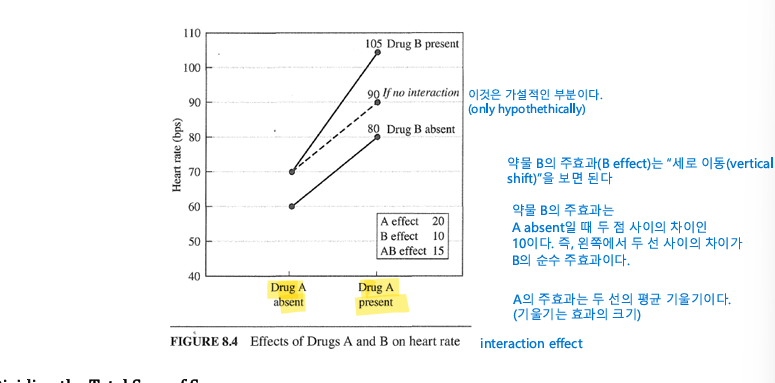



In [7]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [8]:
# Load the dataset
movie = pd.read_csv('/content/drive/MyDrive/data analysis and coding/movie.csv')

In [9]:
# Recode and label the variables
## violent movie
movie["violent"] = movie["violent"].astype('category')
movie["violent"] = movie["violent"].cat.rename_categories({1: 'Non-violent', 2: 'Violent'})
## sexual movie
movie["sexual"] = movie["sexual"].astype('category')
movie["sexual"] = movie["sexual"].cat.rename_categories({1: 'Non-Sexual', 2: 'Sexual'})

# 원래는 숫자형 자료인 것을 범주형 자료로 바꾸는 코드이다.
# 객체.astype() - 데이터타입을 변환하는 함수이다. (즉, 어떤 변수를 범주형으로 할 것인지 명확히 지정해주는 함수이다. )


In [10]:
# Perform two-way ANOVA
twoway = ols('movie["empathy"] ~ movie["violent"] + movie["sexual"] + movie["violent"]:movie["sexual"]', data=movie).fit()
anova_table = sm.stats.anova_lm(twoway)
print(anova_table)

                                    df  sum_sq    mean_sq          F    PR(>F)
movie["violent"]                   1.0    64.0  64.000000  34.909091  0.000072
movie["sexual"]                    1.0    36.0  36.000000  19.636364  0.000819
movie["violent"]:movie["sexual"]   1.0     9.0   9.000000   4.909091  0.046803
Residual                          12.0    22.0   1.833333        NaN       NaN


영가설
요인A의 수준에 따른 평균 차이가 없다.
대안가설
적어도 하나의 뮤j가 다르다

영가설
요인B의 수준에 따른 평균 차이가 없다.
대안
적어도 하나의 뮤k가 다르다

영가설
A의 효과는 B의 수준과 무관하다
대안
두요인은 서로 상호작용을 주고 받는다.  

In [11]:
# Calculate the means for each combination of 'violent' and 'sexual'
means = movie.groupby(["violent", "sexual"]).empathy.mean().unstack() # unstack() converts the 'sexual' index level into columns
print(means)
# unstack()은 투웨이 아노바에서 4개의 조합을 표 형태로 만들어준다

sexual       Non-Sexual  Sexual
violent                        
Non-violent         8.5     7.0
Violent             6.0     1.5


/tmp/ipython-input-3875965256.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = movie.groupby(["violent", "sexual"]).empathy.mean().unstack() # unstack() converts the 'sexual' index level into columns


<Figure size 400x300 with 0 Axes>

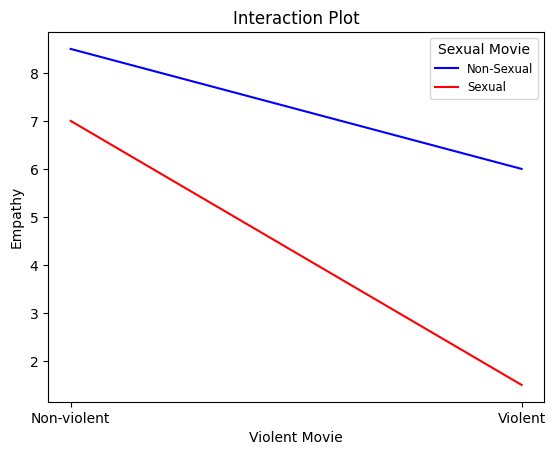

In [12]:
# Plot the interaction
plt.figure(figsize=(4, 3)) # Width = 4 inches, Height = 3 inches
means.plot(kind='line', color=['blue', 'red']) # Specify line color
plt.title('Interaction Plot')
plt.xlabel('Violent Movie')
plt.ylabel('Empathy')
plt.xticks([0, 1], ['Non-violent', 'Violent'])  # set x-axis tick labels
plt.legend(title='Sexual Movie', loc='upper right', fontsize='small')  # set legend location and font size
plt.show()

상호작용 효과가 없다면 Fab가 유의하지 않다. (그래프가 평행함)

주효과가 존재해도 상호작용 효과는 유의하지 않을 수 있다. 즉, 주효과가 매우 커도 상호작용 효과가 없을 수 있다.
상호작용 효과가 없는 경우 A와 B가 독립적으로 영향을 준다는 의미이다.  

추가로 A와 B의 주효과가 유의하지 않더라도 '''상호작용효과만'''유의할 수 있다. 상호작용 효과는 기울기 변화를 검정하기 때문이다!!